In [1]:
using Pkg,Plots
Pkg.activate("..")
using Clapeyron

  Activating environment at `C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\Project.toml`


In this notebook we will try to replicate various figures from V. Papaioannou _et al._ 's 2016 paper

## Figure 2

In [2]:
# Setting up the models
methane      = SAFTVRMie(["methane"])
CO2          = SAFTVRMie(["carbon dioxide"]);

In [3]:
# Get critical point for all species
(T_c_methane, p_c_methane, v_c_methane)  = crit_pure(methane)
(T_c_CO2, p_c_CO2, v_c_CO2)              = crit_pure(CO2);

In [4]:
# Get saturation properties for all species
T_methane = range(100, T_c_methane, length = 50)
T_CO2     = range(200, T_c_CO2, length = 50)

A = sat_pure.(methane,T_methane)
B = sat_pure.(CO2,T_CO2)

methane_sat = [tup[i] for tup in A, i in 1:3]
CO2_sat = [tup[i] for tup in B, i in 1:3];

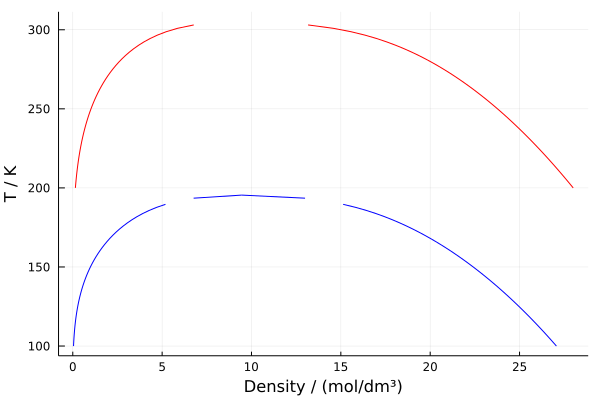

In [5]:
plt = plot(1e-3 ./methane_sat[:,2], T_methane,color=:blue,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./methane_sat[:,3], T_methane,color=:blue, label = "")
plt = plot!(1e-3 ./CO2_sat[:,2], T_CO2,color=:red, label = "")
plt = plot!(1e-3 ./CO2_sat[:,3], T_CO2,color=:red, label = "")
display(plt)

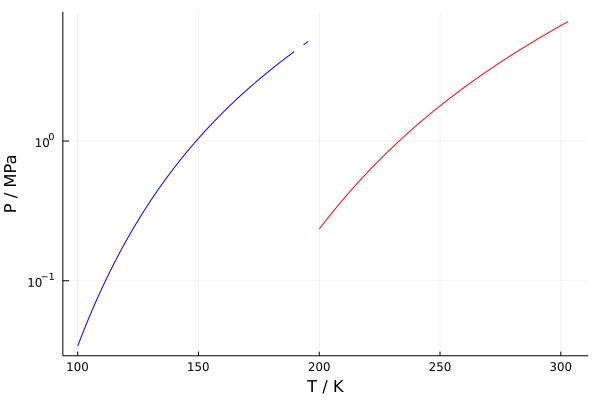

In [6]:
plt = plot(T_methane, methane_sat[:,1]/1e6,color=:blue,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
plt = plot!(T_CO2, CO2_sat[:,1]/1e6,color=:red,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)

## Figure 3

In [7]:
# Setting up the models
CO2      = SAFTVRMie(["carbon dioxide"]);

In [8]:
# Get various isotherms
T = range(200,800,length=100)
v_1 = volume.(CO2,10*1e6,T) 
v_2 = volume.(CO2,20*1e6,T)
v_3 = volume.(CO2,30*1e6,T)
v_4 = volume.(CO2,40*1e6,T)
v_5 = volume.(CO2,50*1e6,T);

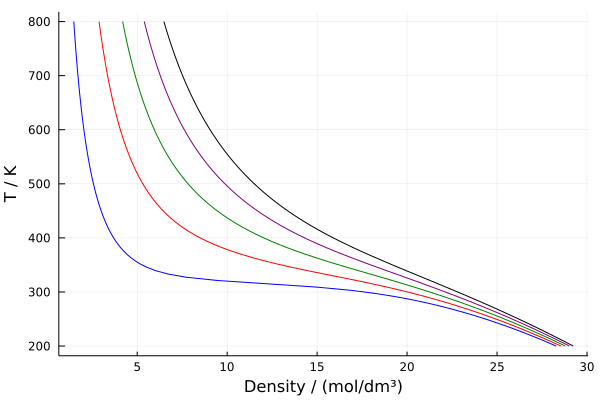

In [9]:
plt = plot(1e-3 ./v_1, T,color=:blue,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./v_2, T,color=:red, label = "")
plt = plot!(1e-3 ./v_3, T,color=:green, label = "")
plt = plot!(1e-3 ./v_4, T,color=:purple, label = "")
plt = plot!(1e-3 ./v_5, T,color=:black, label = "")
display(plt)

## Figure 4

In [10]:
# Setting up the models
water    = SAFTVRMie(["water"])
methanol = SAFTVRMie(["methanol"]);

In [11]:
# Get critical point for all species
(T_c_methanol, p_c_methanol, v_c_methanol)  = crit_pure(methanol)
(T_c_water, p_c_water, v_c_water)           = crit_pure(water);

In [12]:
# Get saturation properties for all species
T_methanol = range(220, T_c_methanol, length = 50)
T_water     = range(280, T_c_water, length = 50)

A = sat_pure.(methanol,T_methanol)
B = sat_pure.(water,T_water)

methanol_sat = [tup[i] for tup in A, i in 1:3]
water_sat = [tup[i] for tup in B, i in 1:3];

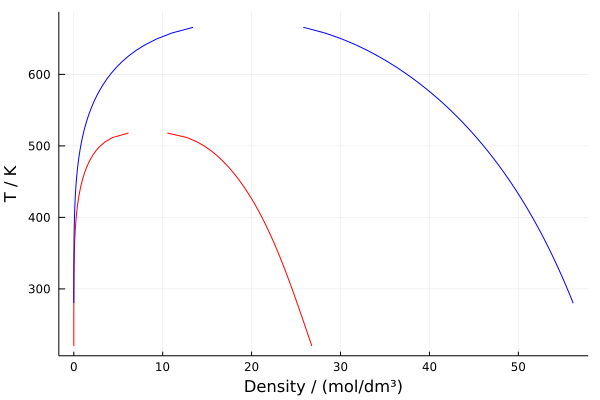

In [13]:
plt = plot(1e-3 ./methanol_sat[:,2], T_methanol,color=:red,xlabel="Density / (mol/dm³)",ylabel="T / K", label = "")
plt = plot!(1e-3 ./methanol_sat[:,3], T_methanol,color=:red, label = "")
plt = plot!(1e-3 ./water_sat[:,2], T_water,color=:blue, label = "")
plt = plot!(1e-3 ./water_sat[:,3], T_water,color=:blue, label = "")
display(plt)

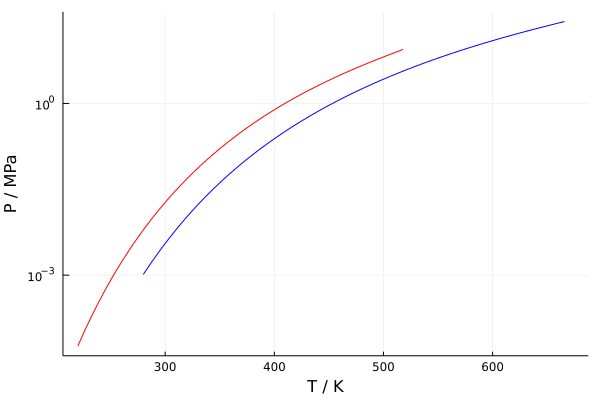

In [14]:
plt = plot(T_methanol, methanol_sat[:,1]/1e6,color=:red,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
plt = plot!(T_water, water_sat[:,1]/1e6,color=:blue,yaxis=:log,xlabel="T / K",ylabel="P / MPa", label = "")
display(plt)